'1.14.0'

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

In [3]:
os.chdir('/content/gdrive/MyDrive')

In [5]:
#importing necessary libraries
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from glob import glob
import numpy as np

In [6]:
#defining the constants
IMAGE_SIZE = [224,224]

In [7]:
#Instantiating the model
vgg19 = VGG19(input_shape= IMAGE_SIZE + [3] , weights = 'imagenet',include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [8]:
for layer in vgg19.layers:
  layer.trainable = False

In [9]:
folders = glob('Dataset/Train/*')

In [10]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [11]:
x = Flatten()(vgg19.output)

In [12]:
prediction = Dense(len(folders),activation='softmax')(x)

In [14]:
model = Model(inputs = vgg19.input , outputs= prediction)

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
#Using image Data generator to load the image from dataset 
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
#Loading the train_dataset 
train_set = train_datagen.flow_from_directory('Dataset/Train',class_mode='categorical',batch_size=32,target_size=(224,224))

Found 416 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('Dataset/Test',target_size=(224,224),class_mode='categorical',batch_size=32)

Found 134 images belonging to 2 classes.


In [42]:
train_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [21]:
#fitting the model
r = model.fit_generator(train_set, epochs=20,validation_data=test_set,validation_steps=len(test_set),steps_per_epoch=len(train_set))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 190s 12s/step - loss: 1.7737 - accuracy: 0.5288 - val_loss: 0.7481 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 6s 448ms/step - loss: 0.7636 - accuracy: 0.6274 - val_loss: 0.6261 - val_accuracy: 0.6791
Epoch 3/20
13/13 [==============================] - 6s 450ms/step - loss: 0.4616 - accuracy: 0.7885 - val_loss: 0.4875 - val_accuracy: 0.7687
Epoch 4/20
13/13 [==============================] - 6s 458ms/step - loss: 0.3764 - accuracy: 0.8534 - val_loss: 0.3792 - val_accuracy: 0.8060
Epoch 5/20
13/13 [==============================] - 6s 450ms/step - loss: 0.3089 - accuracy: 0.8918 - val_loss: 0.3700 - val_accuracy: 0.8358
Epoch 6/20
13/13 [==============================] - 6s 451ms/step - loss: 0.2861 - accuracy: 0.8846 - val_loss: 0.3527 - val_accuracy: 0.8358
Epoch 7/20
13/13 [==============================] - 6s 459ms/step - loss: 0.2894 - accuracy: 0.8774 - val_loss: 0.4707 - val_accuracy: 0.7612
Epoch 

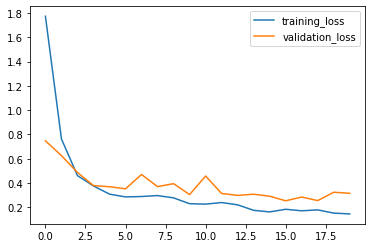

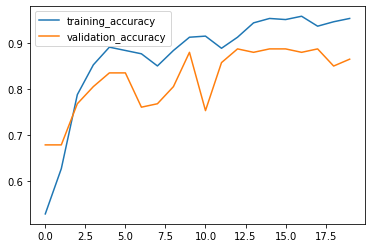

<Figure size 432x288 with 0 Axes>

In [23]:
#Plotting the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label =  'training_loss')
plt.plot(r.history['val_loss'],label = 'validation_loss')
plt.legend()
plt.show()
plt.savefig("Loss_plot")

#Plotting the accuracy
plt.plot(r.history['accuracy'],label = 'training_accuracy')
plt.plot(r.history['val_accuracy'],label = 'validation_accuracy')
plt.legend()
plt.show()
plt.savefig("Accuracy_plot")

In [24]:
model.save('malaria_detection_vgg19.h5')

In [25]:
#prediction 
y_pred = model.predict(test_set)

In [26]:
y_pred

array([[9.4332434e-02, 9.0566754e-01],
       [1.1401493e-01, 8.8598514e-01],
       [7.3927605e-01, 2.6072392e-01],
       [5.9356332e-01, 4.0643674e-01],
       [1.6938093e-01, 8.3061904e-01],
       [6.9471151e-01, 3.0528855e-01],
       [7.0295177e-02, 9.2970484e-01],
       [8.4748685e-02, 9.1525131e-01],
       [9.8772191e-02, 9.0122783e-01],
       [4.3867913e-01, 5.6132084e-01],
       [3.6858693e-01, 6.3141304e-01],
       [9.8982656e-01, 1.0173432e-02],
       [7.9108107e-01, 2.0891891e-01],
       [3.2000250e-01, 6.7999750e-01],
       [5.0998833e-02, 9.4900119e-01],
       [2.4383830e-01, 7.5616169e-01],
       [7.3915040e-01, 2.6084960e-01],
       [8.5600191e-01, 1.4399810e-01],
       [1.1398834e-01, 8.8601166e-01],
       [9.9997997e-01, 1.9986135e-05],
       [7.7756804e-01, 2.2243191e-01],
       [7.4614316e-01, 2.5385684e-01],
       [9.9780732e-01, 2.1927259e-03],
       [2.2260176e-01, 7.7739823e-01],
       [9.9818331e-01, 1.8166709e-03],
       [6.2499928e-01, 3.

In [27]:
import numpy as np
y_pred = np.argmax(y_pred ,axis=1)

In [28]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0])

In [29]:
#Loading the saved model and predicting using saved model
from tensorflow.keras.models import load_model

In [30]:
model = load_model('malaria_detection_vgg19.h5')

In [78]:
#Loading the uninfected data and checking 
img = image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [79]:
x = image.img_to_array(img)

In [80]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [81]:
x.shape

(224, 224, 3)

In [82]:
#Rescaling
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [74]:
pred = model.predict(img_data)

In [75]:
result = np.argmax(pred , axis=1)

In [76]:
result

array([1])

In [77]:
if(result==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
